# 2 Regularized logistic regression

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import path
import matplotlib.patches as patches

In [200]:
data = pd.read_csv('../data/ex2data2.txt', header=None)
data.columns = ['test1', 'test2', 'accept']
data.head()

,test1,test2,accept
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


## 2.1 Visualizing the data

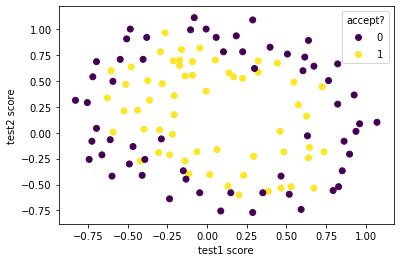

In [201]:
scatter = plt.scatter('test1','test2', c='accept', data=data)
plt.gca().legend(*scatter.legend_elements(), title="accept?")
plt.xlabel('test1 score')
plt.ylabel('test2 score')
plt.show()

## 2.2 Feature mapping

In [202]:
def sig(x):
    return 1/(1+np.exp(-x))

In [203]:
def getData(data):
    """
    get data from datafram, last column is the labels.
    adds column of ones to X, as first column
        :param data: dataframe
        :return: X.shape (#data_points, #features), y.shape (#data_points, )
    """
    X = np.append(np.ones([data.shape[0],1]),data.iloc[:, :-1], axis=1)
    y = data.iloc[:, -1].values
    return X, y

In [250]:
def mapFeature(X, poly_deg = 6):
    newDim = np.arange(1, poly_deg+2).sum()    
    newX = np.zeros([X.shape[0],newDim])
    pos = 0
    
    for i in range(poly_deg+1):
        for j in range(poly_deg-i+1):
            newX[:,pos] = (X[:,1]**i)*(X[:,2]**j)
            pos+=1
    return newX

## 2.3 Cost function and gradient

In [205]:
def costFunction(theta, X, y, l):
    h = sig(X.dot(theta))
    cost = (-y*np.log(h)-(1-y)*np.log(1-h)).sum()/len(y)
    reg = (theta[1:]**2).sum()*l/(2*len(y))
    return cost + reg

In [206]:
def computGrad(theta, X, y, l):
    h = sig(X.dot(theta))
    costGrad = (h-y).dot(X)/len(y)
    regGrad = (l/len(y))*theta
    regGrad[0] = 0
    return costGrad + regGrad

In [260]:
X,y = getData(data)
X = mapFeature(X)
init_theta = np.zeros(X.shape[1])
l = 100 # lambda 

op_result = minimize(costFunction, init_theta , args=(X,y,l), jac=computGrad, method='L-BFGS-B')
op_result.success

True

## 2.4 Plotting the decision boundary

In [253]:
def onePointMapFeature(x1,x2,poly_deg = 6):
    newDim = np.arange(1, poly_deg+2).sum()
    newX = np.zeros(newDim)
    pos = 0
    for i in range(poly_deg+1):
        for j in range(poly_deg-i+1):
            newX[pos] = (x1**i)*(x2**j)
            pos+=1
    return newX

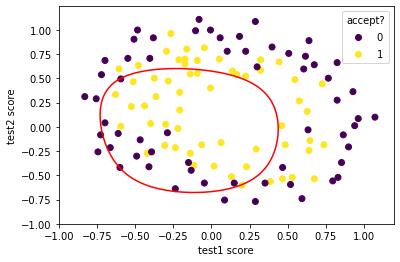

In [261]:
resulution = 100
test1_range = np.linspace(-1,1,resulution)
test2_range = np.linspace(-1,1,resulution)

Z = np.zeros([resulution,resulution])
for i in range(resulution):
    for j in range(resulution):
        Z[j,i] = onePointMapFeature(test1_range[i], test2_range[j]).dot(op_result.x)


plt.contour(test1_range, test2_range, Z, [0], colors='red')

scatter = plt.scatter('test1','test2', c='accept', data=data)
plt.gca().legend(*scatter.legend_elements(), title="accept?")
plt.xlabel('test1 score')
plt.ylabel('test2 score')
plt.show()

In [262]:
acc = 1-(np.abs((X.dot(op_result.x)>0)-y).sum()/len(y))
print('The accuracy is: ' + str(acc))

The accuracy is: 0.6101694915254237
